The factors that lead to employee attrition based on collected data in IBM Human Resource Department

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
total_records= len(df)
print(total_records)


1470


1.a) Choose one variable and plot that variable four different ways.

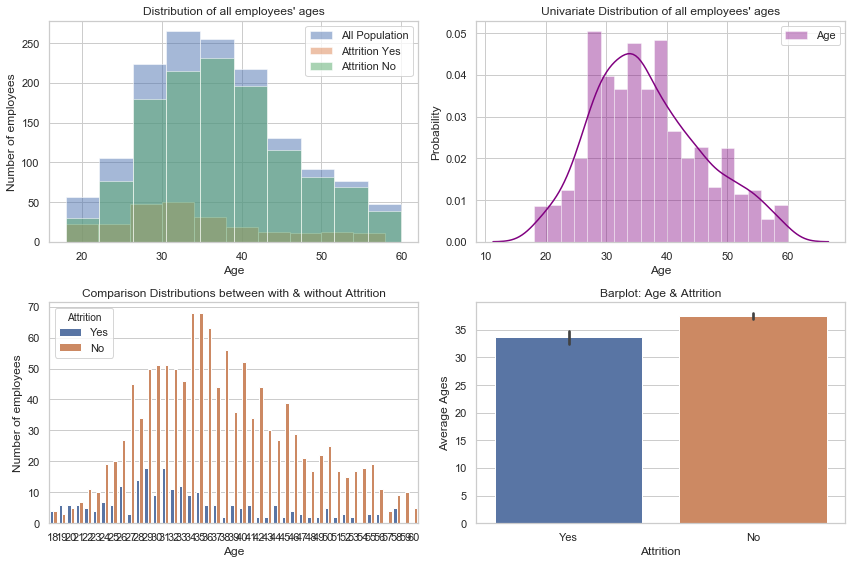

In [27]:
Age_with_attrition = df['Age'].loc[df['Attrition'] == 'Yes']
Age_without_attrition = df['Age'].loc[df['Attrition'] == 'No']
Age = df['Age']

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

plt.subplot(2, 2, 1)
plt.hist(Age, alpha = 0.5, label = 'All Population')
plt.hist(Age_with_attrition, alpha = 0.5, label = 'Attrition Yes')
plt.hist(Age_without_attrition, alpha = 0.5, label = 'Attrition No')
plt.ylabel('Number of employees')
plt.xlabel('Age')
plt.title('Distribution of all employees\' ages')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.distplot(Age, color = 'purple', label = 'Age')
plt.ylabel('Probability')
plt.title('Univariate Distribution of all employees\' ages')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x=Age, hue='Attrition')
plt.ylabel('Number of employees')
plt.xlabel('Age')
plt.title('Comparison Distributions between with & without Attrition')

plt.subplot(2, 2, 4)
sns.barplot(x = 'Attrition', y = 'Age', data =df)
plt.ylabel('Average Ages')
plt.xlabel('Attrition')
plt.title('Barplot: Age & Attrition')

plt.tight_layout()
plt.show()

1.b) Choose two continuous variables, and plot them three different way

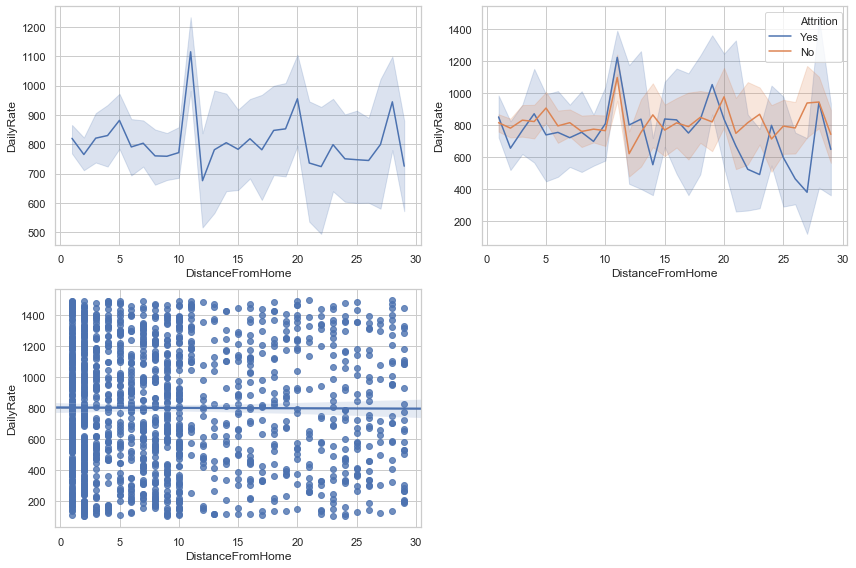

In [82]:
# DailyRate & DistanceFromHome

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.lineplot(y=df['DailyRate'], x=df['DistanceFromHome'], data=df)

plt.subplot(2, 2, 2)
sns.lineplot(y=df['DailyRate'], x=df['DistanceFromHome'], hue='Attrition', data=df)

plt.subplot(2, 2, 3)
sns.regplot(y=df['DailyRate'], x=df['DistanceFromHome'], scatter=True,fit_reg=True ,data=df)

plt.tight_layout()
plt.show()

1.c) Choose one continuous variable and one categorical variable, and plot them six different ways.

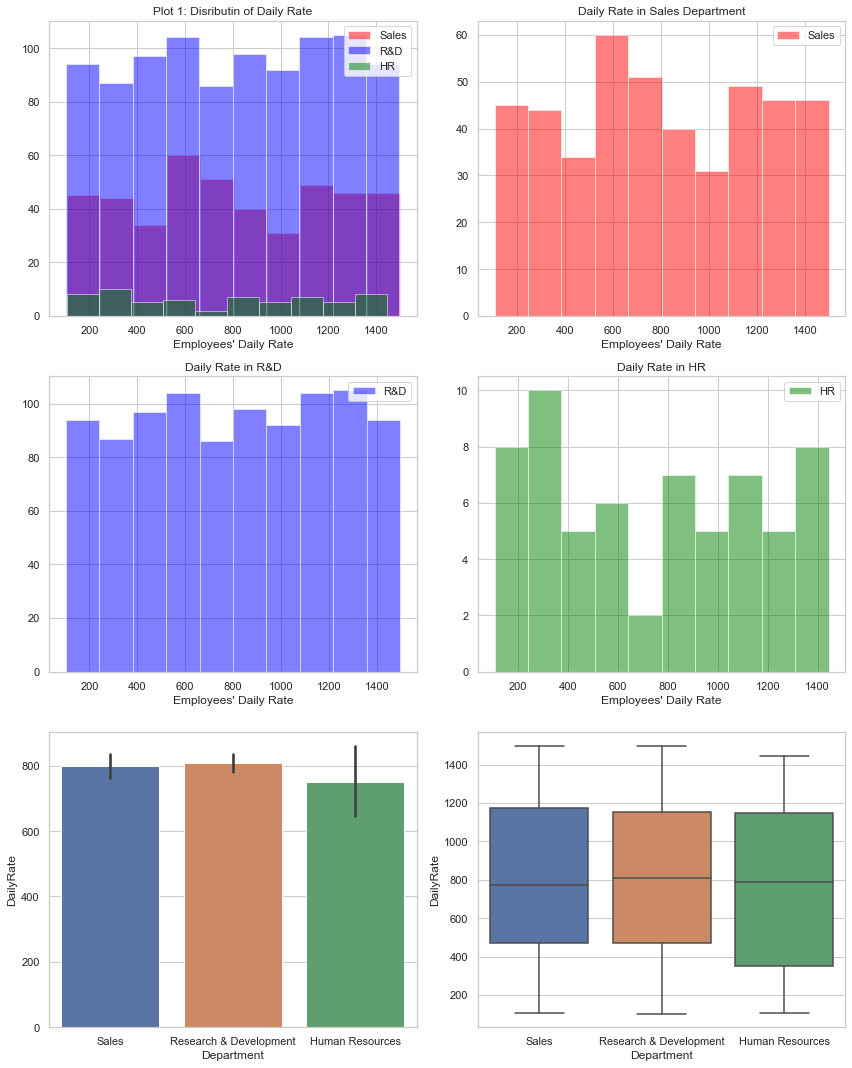

In [13]:
sns.set(style="whitegrid")
sales = df.loc[(df['Department']=='Sales'),'DailyRate']
rd = df.loc[(df['Department']=='Research & Development'),'DailyRate']
hr = df.loc[(df['Department']=='Human Resources'),'DailyRate']

plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
plt.hist(sales, color='red',  alpha=.5,label='Sales')  
plt.hist(rd, color='blue', alpha=.5,label='R&D')
plt.hist(hr, color='green', alpha=.5,label='HR')  
plt.xlabel('Employees\' Daily Rate')
plt.legend(loc='upper right')
plt.title('Plot 1: Disributin of Daily Rate')

plt.subplot(3, 2, 2)
plt.hist(sales, color='red',  alpha=.5,label='Sales')  
plt.xlabel('Employees\' Daily Rate')
plt.legend(loc='upper right')
plt.title('Daily Rate in Sales Department')

plt.subplot(3, 2, 3)
plt.hist(rd, color='blue', alpha=.5,label='R&D')
plt.xlabel('Employees\' Daily Rate')
plt.legend(loc='upper right')
plt.title('Daily Rate in R&D')

plt.subplot(3, 2, 4)
plt.hist(hr, color='green', alpha=.5,label='HR')  
plt.xlabel('Employees\' Daily Rate')
plt.legend(loc='upper right')
plt.title('Daily Rate in HR')

plt.subplot(3, 2, 5)
sns.barplot(x="Department", y="DailyRate", data=df)

plt.subplot(3, 2, 6)
sns.boxplot(x="Department", y="DailyRate", data=df)

plt.tight_layout()
plt.show()



Histogram helps visualize the distribution of the data, but it is not useful when all three overlab on each other. Distplot in this exsmple does like a histogram because here the probability is not interested. Countplot is useful to compare two different category of data, but here many categories(Ages/Years) do not appear very clear. Barplot display a range and distribution of data, and they also show outliers,skew-ness. In this example with boxplots we can have a comparison between different categories that data is distributted. Barplots desplay a total number of data in each section, but it is better to display differen variables. Scatterplots are good to display relation between to numeric variables. In this example, lineplot and regplot of seaborn functions are used to display the relation betweeen to values of the dataset. 

2) Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups
Accompany your plot with a written description of what you see.

Dataset MPG is selected for this section from seaborn detasets archive to display and compare Usa, Europe, and Japanes cars' Miles per Galone rate based on their displacement, horsepower, weight, and acceleratio values.

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


                                 Disribution Plots & Probability


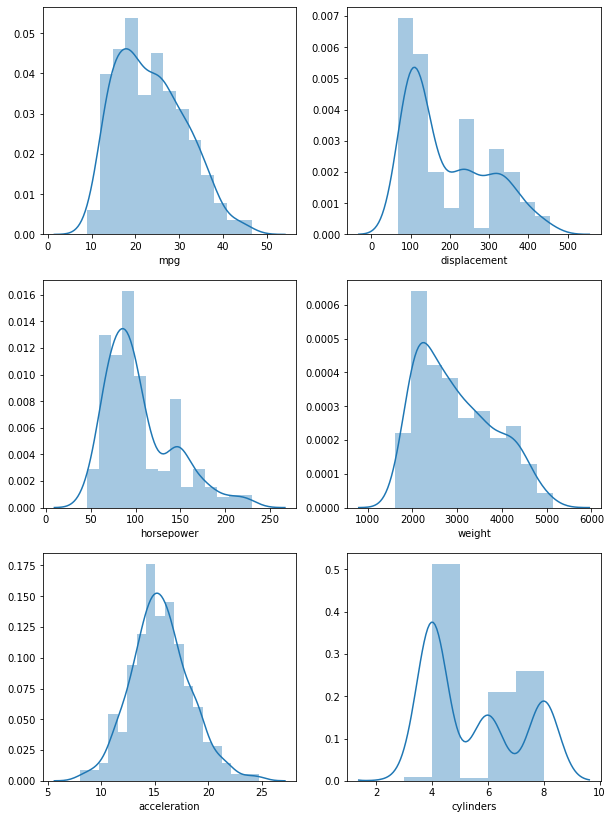

In [19]:
mpg = sns.load_dataset("mpg")
print(mpg.head())
print('\n')
print('                                 Disribution Plots & Probability')
hs = mpg['horsepower'].dropna()
fig, ax = plt.subplots(3,2, figsize=(10,10))
sns.distplot(mpg['mpg'], ax=ax[0,0])
sns.distplot(mpg['displacement'], ax=ax[0,1])
sns.distplot(hs, ax=ax[1,0])
sns.distplot(mpg['weight'], ax=ax[1,1])
sns.distplot(mpg['acceleration'], ax=ax[2,0])
sns.distplot(mpg['cylinders'], ax=ax[2,1])

plt.subplots_adjust(top=1.2)
plt.show()



               Scatter plots regression : MPG by Displacement, Horsepower, Weight, & acceleration


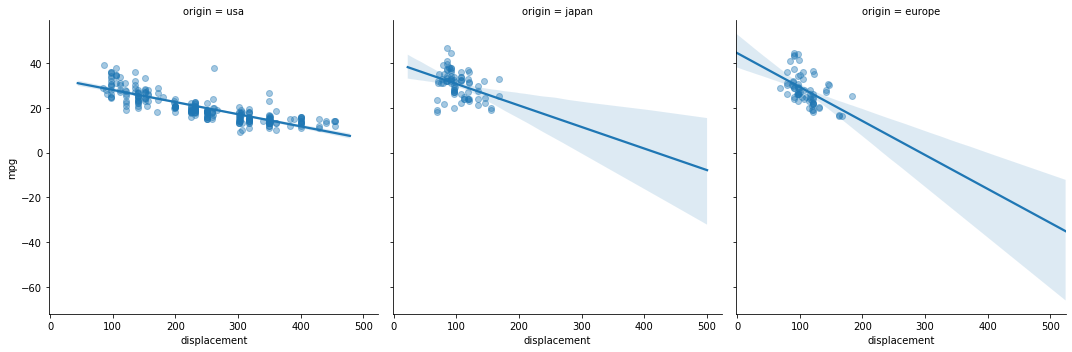

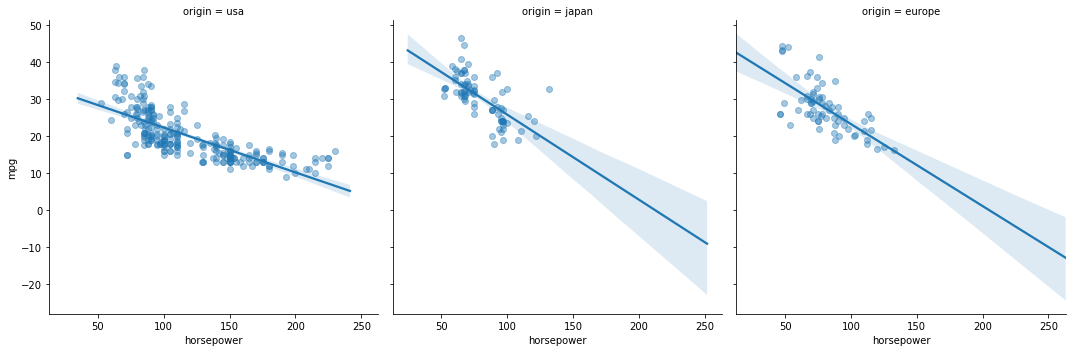

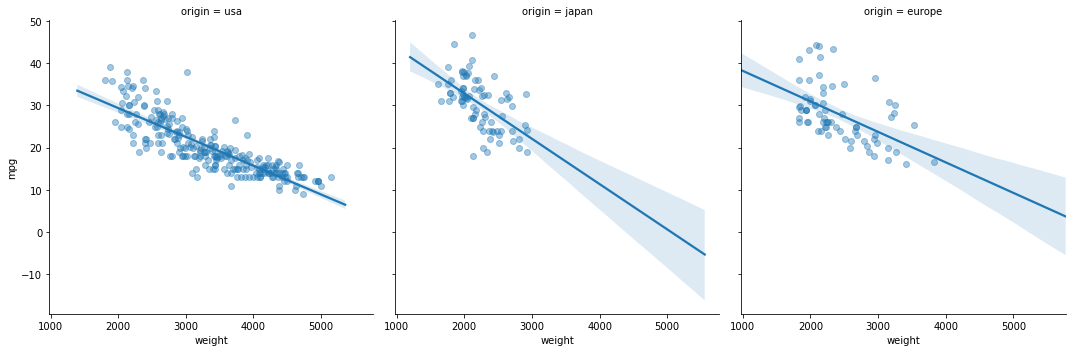

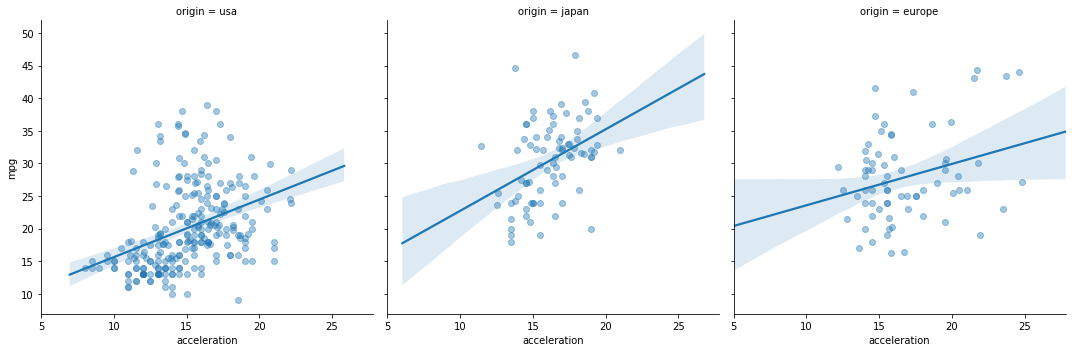

In [20]:
print('               Scatter plots regression : MPG by Displacement, Horsepower, Weight, & acceleration')

g = sns.lmplot(y='mpg', 
               x='displacement',
               data=mpg,
               col='origin',
               fit_reg=True, 
               scatter_kws={'alpha':0.4})


g = sns.lmplot(y='mpg', 
               x='horsepower',
               data=mpg,
               col='origin',
               fit_reg=True, 
               scatter_kws={'alpha':0.4})


g = sns.lmplot(y='mpg', 
               x='weight',
               data=mpg,
               col='origin',
               fit_reg=True, 
               scatter_kws={'alpha':0.4})


g = sns.lmplot(y='mpg', 
               x='acceleration',
               data=mpg,
               col='origin',
               fit_reg=True, 
               scatter_kws={'alpha':0.4})
plt.show()

Observing bivariate plots we can see American cars are in a bigger range of verieties based on their displacement, weight, and horsepower, and include lower MPG values comparison with Europian and Japanese cars. Japanese cars are more econmic including a higher average of MPG.